In [6]:
import tensorflow as tf
import numpy as np
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras

import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math
tf.random.set_seed(0)
np.random.seed(0)

In [7]:
train_ds = tf.data.Dataset.load('../datasets/train_ds')
validation_ds = tf.data.Dataset.load('../datasets/test_ds')

#### Upsampling

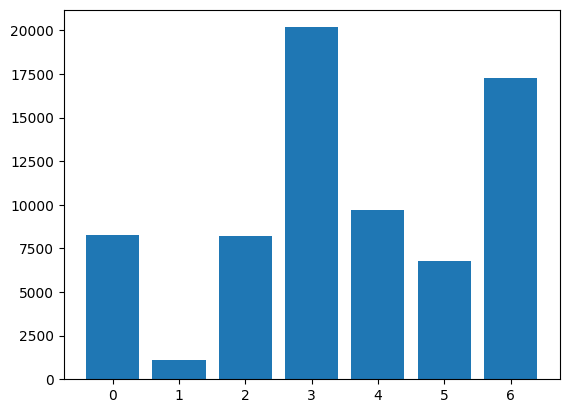

In [3]:
labels = np.concatenate([[np.argmax(y)] for x, y in train_ds.as_numpy_iterator()])
class_labels, counts = np.unique(labels, return_counts=True)
largest_count = np.max(counts)
plt.bar(class_labels, counts)
counts_tensor = tf.convert_to_tensor(counts, dtype=tf.int64)

In [4]:
def get_repeat_count(x, y):
    # test = tf.math.argmax(y)
    # if (test.equal(tf.tensor([0])).sum().dataSync()[0]):
    #     return 2
    # else:
    #     return 1
    # return np.random.choice([0, 100])
    class_count = counts_tensor[tf.math.argmax(y)]
    return (largest_count - class_count)// class_count


In [5]:
train_ds = train_ds.flat_map(lambda x, y: tf.data.Dataset.from_tensors((x, y)).repeat(get_repeat_count(x, y)))

(array([0, 1, 2, 4, 5], dtype=int64), array([ 8278, 18032,  8235,  9682,  6776], dtype=int64))


<BarContainer object of 5 artists>

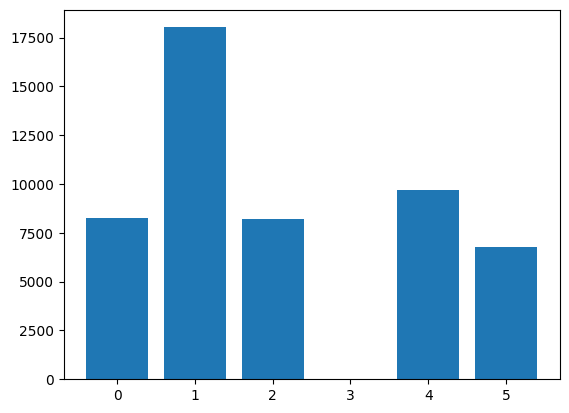

In [6]:
labels = np.concatenate([[np.argmax(y)] for x, y in train_ds.as_numpy_iterator()])
class_labels, counts = np.unique(labels, return_counts=True)
print((class_labels, counts))
plt.bar(class_labels, counts)

In [2]:
next(train_ds.as_numpy_iterator())

NameError: name 'train_ds' is not defined

#### Augmentation

In [9]:
normalization_layer = layers.Normalization(axis=None)
normalization_layer.adapt([x for x, y in train_ds.as_numpy_iterator()])

In [8]:
train_aug = keras.Sequential([
	layers.Rescaling(scale=1.0 / 255),
	layers.RandomFlip("horizontal"),
	layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	layers.RandomRotation(0.05),
    layers.RandomContrast(0.2)
])
validation_aug = keras.Sequential([
	layers.Rescaling(scale=1.0 / 255)
])

In [9]:
train_ds = (
	train_ds
	.batch(64)
	.map(lambda x, y: (train_aug(x), y),
		 num_parallel_calls=tf.data.AUTOTUNE)
	.prefetch(tf.data.AUTOTUNE)
)
validation_ds = (
	validation_ds
	.batch(64)
	.map(lambda x, y: (validation_aug(x), y),
		 num_parallel_calls=tf.data.AUTOTUNE)
	.prefetch(tf.data.AUTOTUNE)
)

In [ ]:
next(validation_ds.as_numpy_iterator())

(array([[[[0.9960785 ],
          [0.9960785 ],
          [0.9960785 ],
          ...,
          [0.0627451 ],
          [0.        ],
          [0.6313726 ]],
 
         [[0.9960785 ],
          [0.9960785 ],
          [0.9960785 ],
          ...,
          [0.06666667],
          [0.        ],
          [0.4784314 ]],
 
         [[0.9960785 ],
          [0.9960785 ],
          [0.9960785 ],
          ...,
          [0.10196079],
          [0.        ],
          [0.44705886]],
 
         ...,
 
         [[0.25882354],
          [0.3372549 ],
          [0.38823533],
          ...,
          [1.        ],
          [0.98823535],
          [0.9960785 ]],
 
         [[0.32941177],
          [0.36078432],
          [0.36078432],
          ...,
          [0.92549026],
          [1.        ],
          [1.        ]],
 
         [[0.3647059 ],
          [0.3529412 ],
          [0.33333334],
          ...,
          [0.16470589],
          [0.5058824 ],
          [0.7058824 ]]],
 
 
        [

In [10]:
train_ds.save('../datasets/augmented_train_ds')
validation_ds.save('../datasets/augmented_validation_ds')